In [16]:
import pandas as pd
import numpy as np

# Set the number of rows to generate
num_rows = 100000

# Generate synthetic data for DRASTIC parameters
depth_to_water = np.random.uniform(5, 50, num_rows)  # Depth to water table in meters
net_recharge = np.random.uniform(50, 300, num_rows)  # Net recharge in mm/year
aquifer_media = np.random.choice(["Gravel", "Sandstone", "Limestone", "Shale", "Basalt"], num_rows)  # Aquifer types
soil_media = np.random.choice(["Sandy", "Clayey", "Loamy", "Peaty"], num_rows)  # Soil types
topography = np.random.uniform(0, 10, num_rows)  # Slope percentage
vadose_zone = np.random.choice(["Sandy", "Fractured", "Gravel", "Silty", "Clay"], num_rows)  # Vadose zone types
hydraulic_conductivity = np.random.uniform(0.01, 0.1, num_rows)  # Conductivity in m/s
land_use = np.random.choice(["Urban", "Agricultural", "Forested"], num_rows)  # Land use types

# Introduce a synthetic Contamination Level (randomly generated between 0 and 100)
contamination_level = np.random.uniform(0, 100, num_rows)

# Categorize contamination levels into "low", "medium", and "high"
contamination_category = pd.qcut(contamination_level, q=3, labels=["low", "medium", "high"])

data = {
    "Depth_to_Water": depth_to_water,
    "Net_Recharge": net_recharge,
    "Aquifer_Media": aquifer_media,
    "Soil_Media": soil_media,
    "Topography": topography,
    "Vadose_Zone": vadose_zone,
    "Hydraulic_Conductivity": hydraulic_conductivity,
    "Land_Use": land_use,
    "Contamination_Level": contamination_level,
    "Contamination_Category": contamination_category,
}

df = pd.DataFrame(data)

print(df.head())

df.to_csv("drastic_synthetic_data_with_contamination.csv", index=False)

print("Synthetic data with contamination category saved as 'drastic_synthetic_data_with_contamination.csv'.")

   Depth_to_Water  Net_Recharge Aquifer_Media Soil_Media  Topography  \
0       31.916948    189.700587        Gravel     Clayey    0.263664   
1       28.220363    156.510197     Sandstone      Loamy    3.053778   
2       35.775359    114.075623     Limestone      Loamy    5.301967   
3       32.913712    184.069927     Limestone      Sandy    6.252462   
4       23.953766    192.550365         Shale      Sandy    8.485527   

  Vadose_Zone  Hydraulic_Conductivity  Land_Use  Contamination_Level  \
0       Sandy                0.098006  Forested            12.486345   
1        Clay                0.074337     Urban            11.280260   
2        Clay                0.020490     Urban            98.268629   
3        Clay                0.099560  Forested             9.535368   
4       Silty                0.036151  Forested            68.094166   

  Contamination_Category  
0                    low  
1                    low  
2                   high  
3                    low  

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the synthetic data
synthetic_data = pd.read_csv('drastic_synthetic_data_with_contamination.csv')

# Generate a contamination level as a synthetic feature
np.random.seed(42)
synthetic_data['Contamination_Level'] = np.random.uniform(0, 100, synthetic_data.shape[0])  # Contamination level

# Categorize contamination levels (low, medium, high)
synthetic_data['Contamination_Category'] = pd.qcut(
    synthetic_data['Contamination_Level'], 3, labels=['low', 'medium', 'high']
)

# One-hot encode categorical variables
categorical_columns = ['Aquifer_Media', 'Soil_Media', 'Vadose_Zone', 'Land_Use']
synthetic_data = pd.get_dummies(synthetic_data, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = synthetic_data.drop(columns=['Contamination_Level', 'Contamination_Category'])
y = synthetic_data['Contamination_Category']

# Scale numerical features for SVM and Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Enable probability for evaluation
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit each model
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Save the trained models for later use
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(log_reg_model, 'logistic_regression_model.joblib')

print("Models trained and saved successfully.")

# Evaluate each model
models = {'Random Forest': rf_model, 'SVM': svm_model, 'Logistic Regression': log_reg_model}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Models trained and saved successfully.
--- Random Forest ---
Accuracy: 0.3287
Classification Report:
              precision    recall  f1-score   support

        high       0.33      0.34      0.33      6667
         low       0.32      0.32      0.32      6667
      medium       0.34      0.32      0.33      6666

    accuracy                           0.33     20000
   macro avg       0.33      0.33      0.33     20000
weighted avg       0.33      0.33      0.33     20000

--- SVM ---
Accuracy: 0.3344
Classification Report:
              precision    recall  f1-score   support

        high       0.33      0.34      0.34      6667
         low       0.34      0.34      0.34      6667
      medium       0.33      0.33      0.33      6666

    accuracy                           0.33     20000
   macro avg       0.33      0.33      0.33     20000
weighted avg       0.33      0.33      0.33     20000

--- Logistic Regression ---
Accuracy: 0.3338
Classification Report:
              pre

                     Accuracy  Precision   Recall  F1 Score      MSE      RMSE
Random Forest         0.32970   0.329736  0.32970  0.329650  1.32325  1.150326
SVM                   0.33910   0.338698  0.33910  0.336403  1.33875  1.157044
Logistic Regression   0.33575   0.335806  0.33575  0.335452  1.35950  1.165976


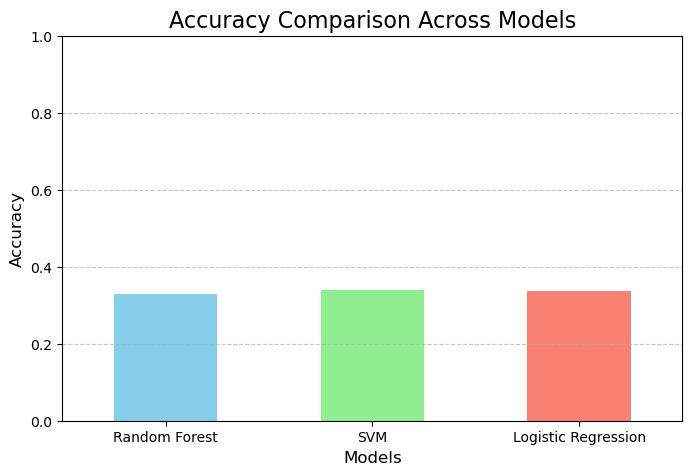

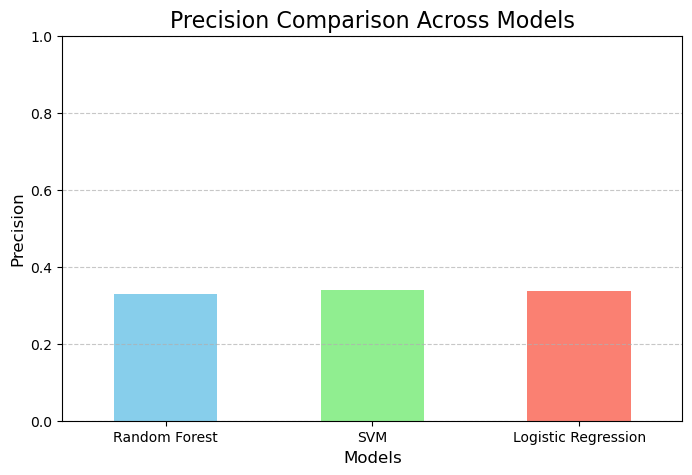

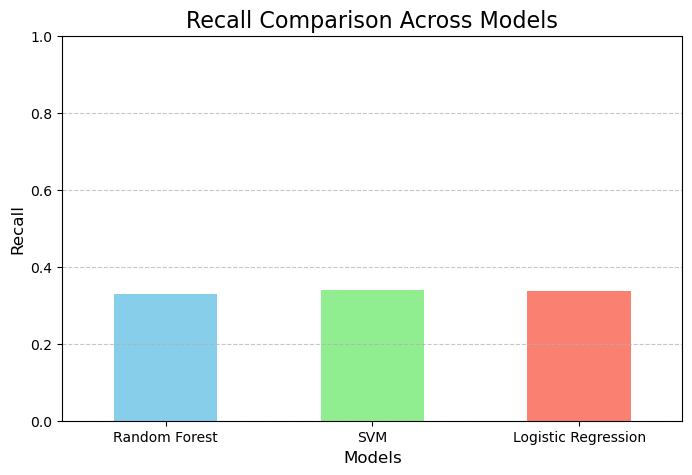

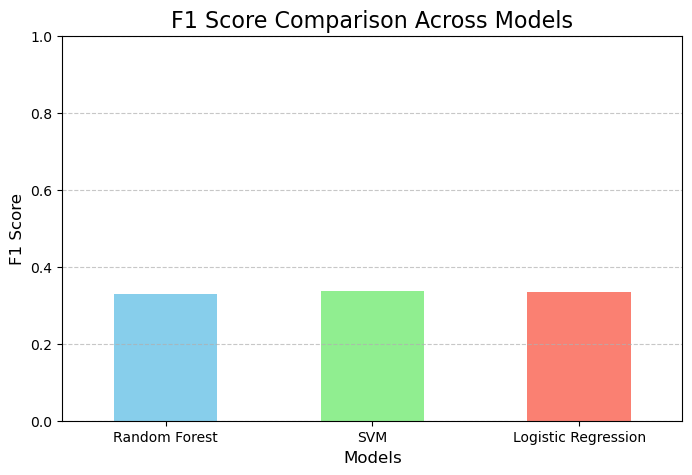

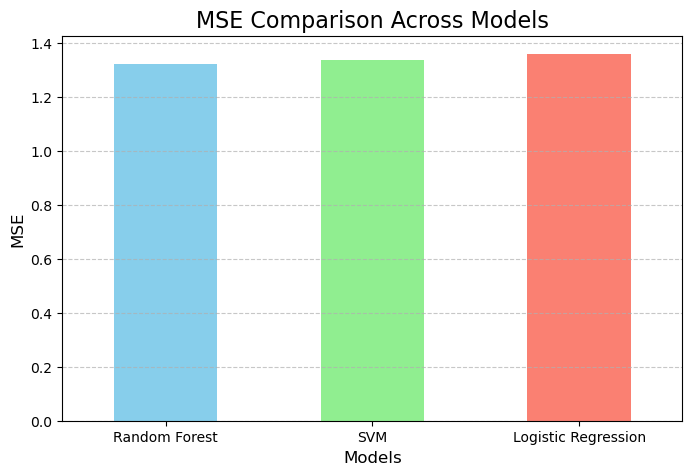

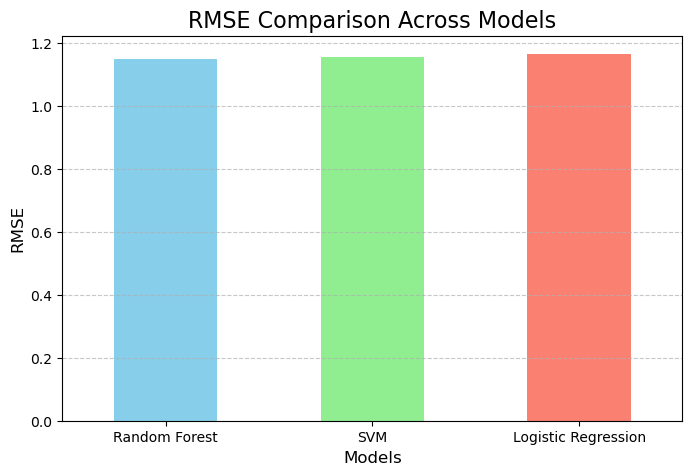

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode target labels (low, medium, high -> 0, 1, 2)

# Train-Test Split with encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train Models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Evaluate Models
models = {'Random Forest': rf_model, 'SVM': svm_model, 'Logistic Regression': log_reg_model}
metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Classification Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Error Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store metrics
    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MSE": mse,
        "RMSE": rmse
    }

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

# Visualize Metrics (similar to the visualization code shared earlier)
classification_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in classification_metrics:
    plt.figure(figsize=(8, 5))
    metrics_df[metric].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], rot=0)
    plt.title(f"{metric} Comparison Across Models", fontsize=16)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Models", fontsize=12)
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Visualize Error Metrics
error_metrics = ['MSE', 'RMSE']
for metric in error_metrics:
    plt.figure(figsize=(8, 5))
    metrics_df[metric].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], rot=0)
    plt.title(f"{metric} Comparison Across Models", fontsize=16)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Models", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()